In [13]:
library(here)
source(here("code/setup.R"))
library(latex2exp)



Attache Paket: ‘reshape2’


Das folgende Objekt ist maskiert ‘package:tidyr’:

    smiths




# RKI data - reporting triangle

We use the reporting triangle for the number of cases, i.e. on any day $t$ the number of cases $$I_{s,t}$$ that are reported associated with date $s < t$. 

We begin our analysis on April 1st 2020, when data have become stable enough to warrant an analysis.

Most delays are less than 4 days, so we consider only those delays, grouping all later delays into a single fifth or larger day.

We perform the same pre-processing as described in chapter 2.3.

In [5]:
full_rep_tri <- read_csv(here("data/raw/rki_cases_deaths_delays.csv")) %>%
    select(t = rki_date, s = county_date, I = cases) %>%
    mutate(tau = t - s) %>%
    filter(s >= ymd("2020-04-01"))


Warning message in scale_fill_viridis_c(trans = "log10"):
“log-10 transformation introduced infinite values.”


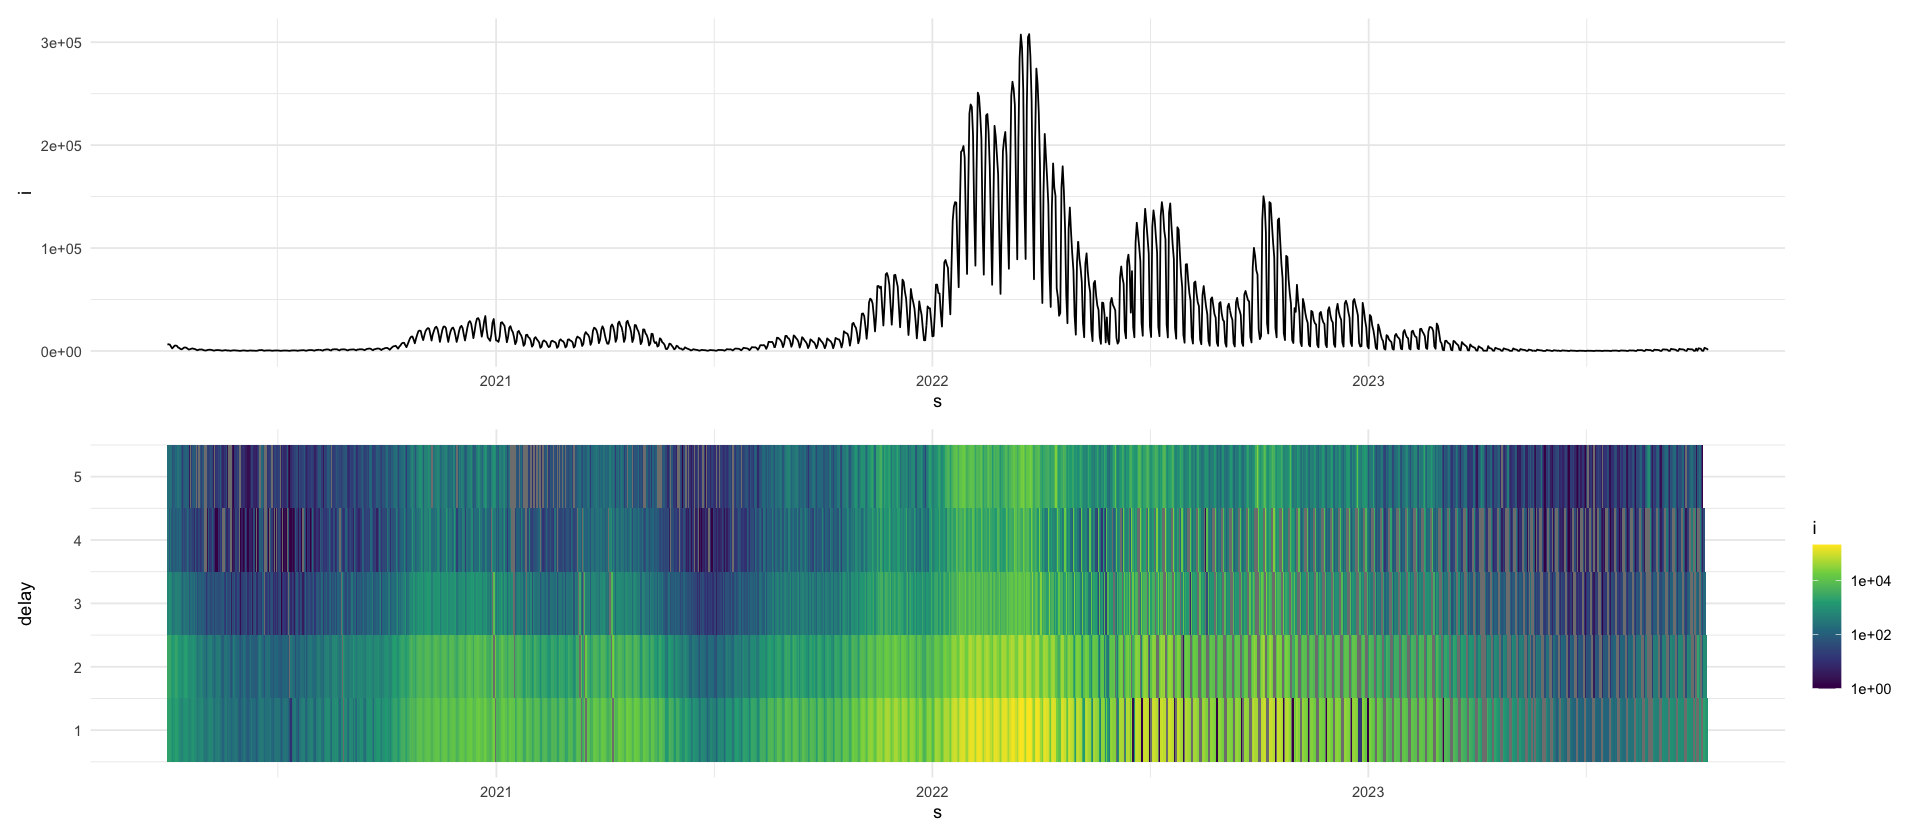

In [16]:
rep_tri_cummax <- full_rep_tri %>%
    arrange(t) %>%
    group_by(s) %>%
    mutate(
        I_tilde = pmin(cummax(I), tail(I, 1)),
    ) %>%
    ungroup()

increments <- rep_tri_cummax %>%
    group_by(s) %>%
    mutate(
        i = I_tilde - lag(I_tilde, default = 0),
    ) %>%
    ungroup()

increments_tau_cutoff <- increments %>%
    mutate(delay = ifelse(tau <= 4, tau, 5)) %>%
    group_by(s, delay) %>%
    summarise(i = sum(i)) %>%
    ungroup()

p_cases <- increments_tau_cutoff %>%
    group_by(s) %>%
    summarise(i = sum(i)) %>%
    ggplot(aes(s, i)) +
    geom_line()

p_delays <- increments_tau_cutoff %>%
    ggplot(aes(s, delay, fill = i)) +
    geom_tile() +
    scale_fill_viridis_c(trans = "log10")


p_cases / p_delays


In [17]:
increments_tau_cutoff %>%
    pivot_wider(id_cols = s, names_from = delay, values_from = i, values_fill = 0)
    

s,1,2,3,4,5
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-04-01,2197,2938,606,312,210
2020-04-02,2161,3160,924,80,225
2020-04-03,2051,2777,850,277,232
2020-04-04,1634,1760,641,85,221
2020-04-05,867,1303,243,67,56
2020-04-06,1428,1676,351,116,93
2020-04-07,1875,2566,482,80,185
2020-04-08,1788,2694,562,94,142
2020-04-09,1923,2201,393,139,260
